# Taller 2b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./src')  # Para importar desde el módulo src

from iterative_methods import gauss_jacobi, gauss_seidel


[07-15 17:27:49][INFO] 2025-07-15 17:27:49.819929


In [17]:
def plot_multiple_trajectories(trays, title, eq_lines=[], labels=[]):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Unificar todos los puntos de todas las trayectorias
    all_points = np.vstack([np.hstack(tray).T for tray in trays])
    x_vals = np.linspace(min(all_points[:, 0]) - 2, max(all_points[:, 0]) + 2, 200)

    # Dibujar las ecuaciones
    for i, line in enumerate(eq_lines):
        y_vals = line(x_vals)
        ax.plot(x_vals, y_vals, linestyle='-', alpha=0.6, linewidth=2, label=f'Ecuación {i+1}')

    # Dibujar las trayectorias
    for i, tray in enumerate(trays):
        tray_np = np.hstack(tray).T
        color = f"C{i}"
        label = labels[i] if i < len(labels) else f'X₀ #{i+1}'

        ax.plot(tray_np[:, 0], tray_np[:, 1], 'o--', color=color, label=label)
        ax.scatter(tray_np[0, 0], tray_np[0, 1], color=color, marker='o', s=80)    # inicio
        ax.scatter(tray_np[-1, 0], tray_np[-1, 1], color=color, marker='X', s=100)  # final

        for j, (x, y) in enumerate(tray_np):
            ax.text(x + 0.2, y + 0.2, f'{j}', fontsize=8, color=color)

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(title)
    ax.grid(True)
    ax.legend()
    ax.axis('equal')
    plt.show()


[07-15 17:57:02][INFO] i= 0 x: [[0. 0.]]
[07-15 17:57:02][INFO] i= 1 x: [[7. 0.]]
[07-15 17:57:02][INFO] i= 2 x: [[7.  2.8]]
[07-15 17:57:02][INFO] i= 3 x: [[4.2 2.8]]
[07-15 17:57:02][INFO] i= 4 x: [[4.2  1.68]]
[07-15 17:57:02][INFO] i= 5 x: [[5.32 1.68]]
[07-15 17:57:02][INFO] i= 6 x: [[5.32  2.128]]
[07-15 17:57:02][INFO] i= 7 x: [[4.872 2.128]]
[07-15 17:57:02][INFO] i= 8 x: [[4.872  1.9488]]
[07-15 17:57:02][INFO] i= 9 x: [[5.0512 1.9488]]
[07-15 17:57:02][INFO] i= 10 x: [[5.0512  2.02048]]
[07-15 17:57:02][INFO] i= 11 x: [[4.97952 2.02048]]
[07-15 17:57:02][INFO] i= 12 x: [[4.97952  1.991808]]
[07-15 17:57:02][INFO] i= 13 x: [[5.008192 1.991808]]
[07-15 17:57:02][INFO] i= 14 x: [[5.008192  2.0032768]]
[07-15 17:57:02][INFO] i= 15 x: [[4.9967232 2.0032768]]
[07-15 17:57:02][INFO] i= 16 x: [[4.9967232  1.99868928]]
[07-15 17:57:02][INFO] i= 17 x: [[5.00131072 1.99868928]]
[07-15 17:57:02][INFO] i= 18 x: [[5.00131072 2.00052429]]
[07-15 17:57:02][INFO] i= 19 x: [[4.99947571 2.00052

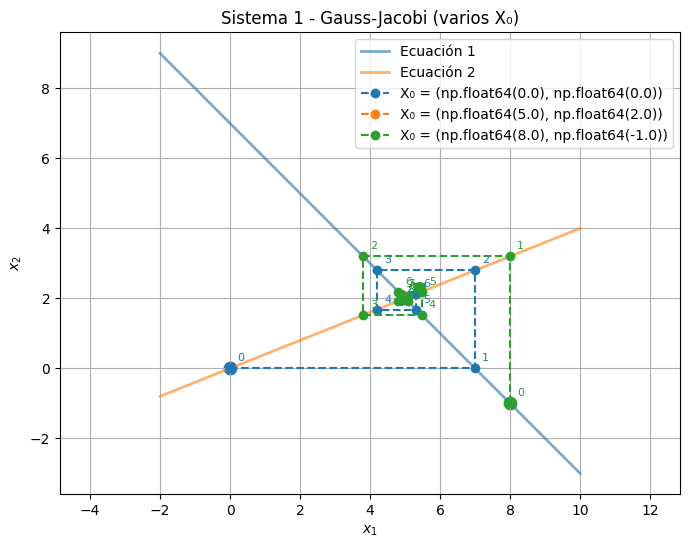

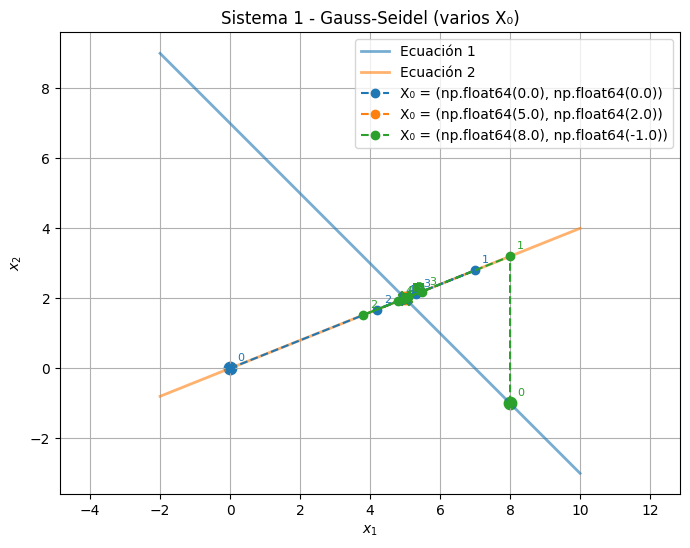

In [18]:
# Sistema 1: x1 + x2 = 7 ; -2x1 + 5x2 = 0
A1 = np.array([[1, 1],
               [-2, 5]])
b1 = np.array([[7], [0]])
iniciales1 = [
    np.array([[0.0], [0.0]]),
    np.array([[5.0], [2.0]]),
    np.array([[8.0], [-1.0]])
]

# Ecuaciones: x2 = 7 - x1 ; x2 = (2/5)x1
eqs_sistema1 = [lambda x: 7 - x, lambda x: (2/5) * x]

trays_jacobi_1 = []
trays_seidel_1 = []
labels1 = []

for x0 in iniciales1:
    _, tray_jacobi = gauss_jacobi(A=A1, b=b1, x0=x0, tol=1e-5, max_iter=50)
    resultado_seidel = gauss_seidel(A=A1, b=b1, x0=x0, tol=1e-5, max_iter=50)
    tray_seidel = resultado_seidel[1]

    trays_jacobi_1.append(tray_jacobi)
    trays_seidel_1.append(tray_seidel)
    labels1.append(f'X₀ = {tuple(x0.flatten())}')

plot_multiple_trajectories(trays_jacobi_1, "Sistema 1 - Gauss-Jacobi (varios X₀)", eq_lines=eqs_sistema1, labels=labels1)
plot_multiple_trajectories(trays_seidel_1, "Sistema 1 - Gauss-Seidel (varios X₀)", eq_lines=eqs_sistema1, labels=labels1)

[07-15 17:57:22][INFO] i= 0 x: [[5. 2.]]
[07-15 17:57:22][INFO] i= 1 x: [[ 4. 10.]]
[07-15 17:57:22][INFO] i= 2 x: [[-4.  8.]]
[07-15 17:57:22][INFO] i= 3 x: [[-2. -8.]]
[07-15 17:57:22][INFO] i= 4 x: [[14. -4.]]
[07-15 17:57:22][INFO] i= 5 x: [[10. 28.]]
[07-15 17:57:22][INFO] i= 6 x: [[-22.  20.]]
[07-15 17:57:22][INFO] i= 7 x: [[-14. -44.]]
[07-15 17:57:22][INFO] i= 8 x: [[ 50. -28.]]
[07-15 17:57:22][INFO] i= 9 x: [[ 34. 100.]]
[07-15 17:57:22][INFO] i= 10 x: [[-94.  68.]]
[07-15 17:57:22][INFO] i= 11 x: [[ -62. -188.]]
[07-15 17:57:22][INFO] i= 12 x: [[ 194. -124.]]
[07-15 17:57:22][INFO] i= 13 x: [[130. 388.]]
[07-15 17:57:22][INFO] i= 14 x: [[-382.  260.]]
[07-15 17:57:22][INFO] i= 15 x: [[-254. -764.]]
[07-15 17:57:22][INFO] i= 16 x: [[ 770. -508.]]
[07-15 17:57:22][INFO] i= 17 x: [[ 514. 1540.]]
[07-15 17:57:22][INFO] i= 18 x: [[-1534.  1028.]]
[07-15 17:57:22][INFO] i= 19 x: [[-1022. -3068.]]
[07-15 17:57:22][INFO] i= 20 x: [[ 3074. -2044.]]
[07-15 17:57:22][INFO] i= 21 x: [[

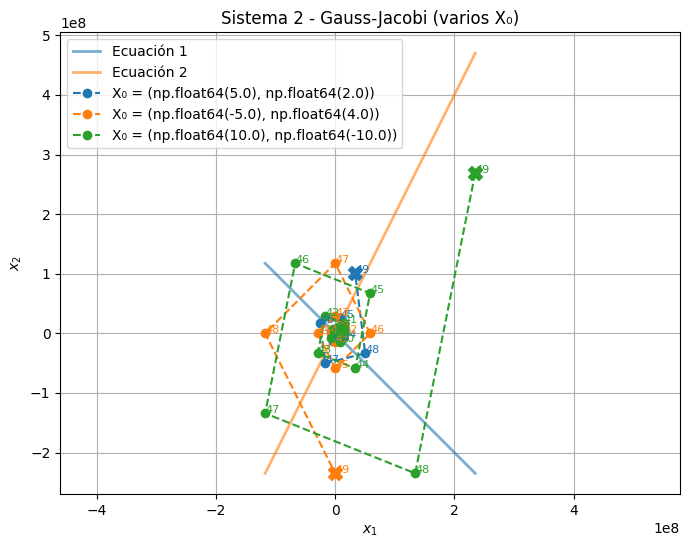

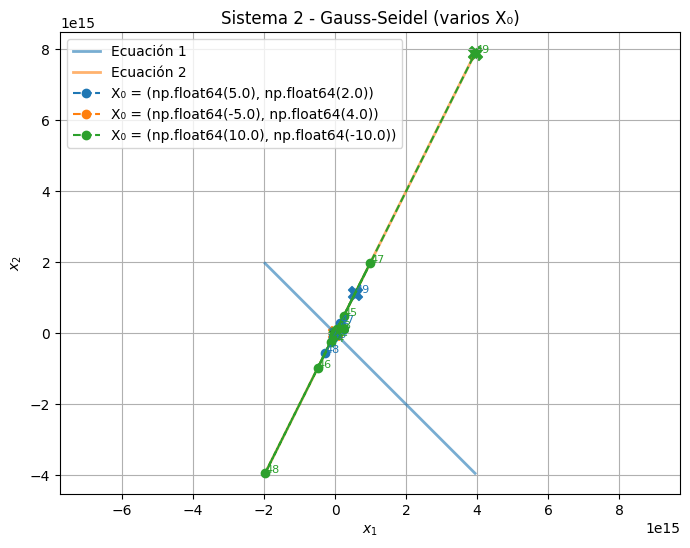

In [19]:
# Sistema 2: x1 + x2 = 6 ; -2x1 + x2 = 0
A2 = np.array([[1, 1],
               [-2, 1]])
b2 = np.array([[6], [0]])
iniciales2 = [
    np.array([[5.0], [2.0]]),
    np.array([[-5.0], [4.0]]),
    np.array([[10.0], [-10.0]])
]

# Ecuaciones: x2 = 6 - x1 ; x2 = 2x1
eqs_sistema2 = [lambda x: 6 - x, lambda x: 2 * x]

trays_jacobi_2 = []
trays_seidel_2 = []
labels2 = []

for x0 in iniciales2:
    _, tray_jacobi = gauss_jacobi(A=A2, b=b2, x0=x0, tol=1e-5, max_iter=50)
    resultado_seidel = gauss_seidel(A=A2, b=b2, x0=x0, tol=1e-5, max_iter=50)
    tray_seidel = resultado_seidel[1]

    trays_jacobi_2.append(tray_jacobi)
    trays_seidel_2.append(tray_seidel)
    labels2.append(f'X₀ = {tuple(x0.flatten())}')

plot_multiple_trajectories(trays_jacobi_2, "Sistema 2 - Gauss-Jacobi (varios X₀)", eq_lines=eqs_sistema2, labels=labels2)
plot_multiple_trajectories(trays_seidel_2, "Sistema 2 - Gauss-Seidel (varios X₀)", eq_lines=eqs_sistema2, labels=labels2)